In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def calculate_contact_angle(gamma_sv, gamma_sl, gamma_lv):
    """
    Calculates the contact angle based on Young-Dupré equation.
    
    Parameters:
    gamma_sv (float): Interfacial tension between solid and vapor (mN/m)
    gamma_sl (float): Interfacial tension between solid and liquid (mN/m)
    gamma_lv (float): Interfacial tension between liquid and vapor (mN/m)
    
    Returns:
    float: Contact angle in degrees, or a message if unphysical.
    """
    # Calculate the cosine of the contact angle
    cos_theta = (gamma_sv - gamma_sl) / gamma_lv
    print(f"cos_theta -> {cos_theta} = ({gamma_sv} - {gamma_sl}) / {gamma_lv}")
    
    # Check if the result is within the physical range
    if cos_theta < -1 or cos_theta > 1:
        return None, "Unphysical values. Please check the interfacial tensions."
    
    # Calculate the contact angle in radians
    theta_radians = np.arccos(cos_theta)
    
    return theta_radians, None

def plot_droplet(theta_radians):
    """
    Plots a droplet with a given contact angle on a solid surface.
    
    Parameters:
    theta_radians (float): Contact angle in radians.
    """
    # Define the circle parameters
    radius = 1  # Arbitrary radius
    center = (0, 1.5) 
    
    # Create an array of angles from pi to 2*pi - theta
    theta = np.linspace(np.pi - theta_radians, np.pi + theta_radians, 100)
    
    # Calculate x, y coordinates of the droplet
    x = center[0] + radius * np.cos(theta)
    y = center[1] + radius * np.sin(theta)
    
    # Plotting the droplet
    plt.figure(figsize=(8, 8))
    plt.plot(x, y, 'b')  # Droplet
    plt.plot([x[-1], x[-1]], [-3*radius, 3*radius], 'k')  # Surface
    plt.fill_between(x, y, 0, color='blue', alpha=0.3)  # Fill droplet
    plt.xlim(-1.5*radius, 1.5*radius)
    plt.ylim(0.4*radius, 2.6*radius)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.title(f"Contact Angle = {np.degrees(theta_radians):.2f}°")
    plt.xlabel(" ")
    plt.ylabel(" ")
    plt.tick_params(left = False, bottom = False, labelleft = False, labelbottom = False) 
    plt.show()


cos_theta -> 0.25 = (25 - 20) / 20


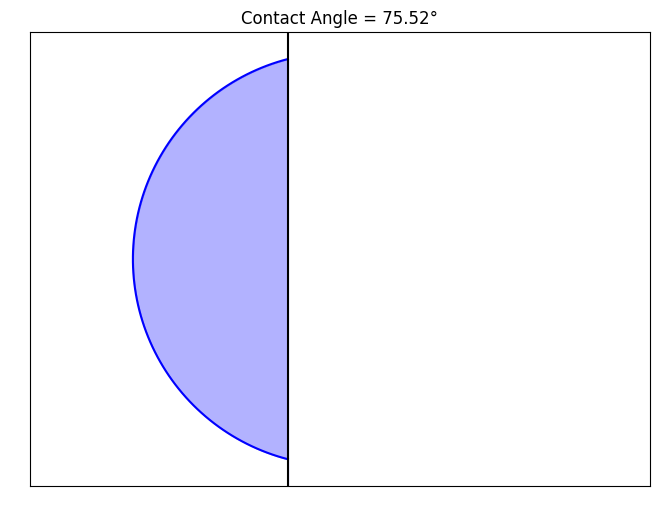

In [3]:
# determine
gamma_sv = 25 #solido-vapor
gamma_sl = 20 #solido-liquido
gamma_lv = 20 #liquido-vapor

theta_radians, error = calculate_contact_angle(gamma_sv, gamma_sl, gamma_lv)
if theta_radians is not None:
    plot_droplet(theta_radians)
else:
    print(error)
